In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ML competition/Cancer/Data/train'
valid_path = '/content/drive/MyDrive/ML competition/Cancer/Data/valid'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/ML competition/Cancer/Data/train/*')

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML competition/Cancer/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML competition/Cancer/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
613/613 [==============================] - 513s 835ms/step - loss: 1.9020 - accuracy: 0.5579 - val_loss: 0.9686 - val_accuracy: 0.6984
Epoch 2/5
613/613 [==============================] - 501s 817ms/step - loss: 1.3191 - accuracy: 0.7227 - val_loss: 0.9028 - val_accuracy: 0.7175
Epoch 3/5
613/613 [==============================] - 499s 815ms/step - loss: 0.8173 - accuracy: 0.8124 - val_loss: 0.9498 - val_accuracy: 0.7365
Epoch 4/5
613/613 [==============================] - 500s 817ms/step - loss: 0.8818 - accuracy: 0.8352 - val_loss: 0.7223 - val_accuracy: 0.7968
Epoch 5/5
613/613 [==============================] - 543s 887ms/step - loss: 0.5132 - accuracy: 0.8842 - val_loss: 6.4855 - val_accuracy: 0.4825


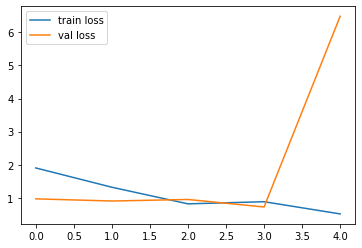

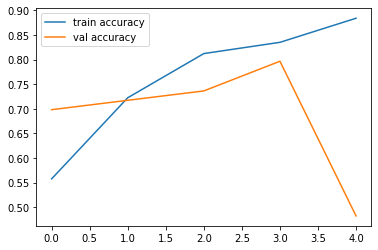

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[4.6551853e-05, 9.4203490e-01, 3.0304429e-13, 5.7918470e-02],
       [3.0258978e-08, 9.9999976e-01, 6.5804397e-15, 2.4189171e-07],
       [7.9467277e-10, 1.0000000e+00, 5.8995354e-19, 1.1054380e-17],
       ...,
       [9.9887234e-01, 1.1276938e-03, 2.8690521e-13, 4.4203130e-08],
       [5.5175479e-11, 1.0000000e+00, 8.7892602e-15, 3.5216537e-14],
       [5.7017159e-02, 9.4298279e-01, 2.4832814e-12, 1.6005824e-09]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 3, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 3, 1, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/ML competition/Cancer/Data/test/adenocarcinoma/000109 (2).png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
